# T4FOXSI2 - Analysis
### August, 2018
### Milo BC - Berkeley

In [1]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap 
import numpy as np
import astropy.io.fits as pyfits

In [2]:
ang = [-82.5000, -75.0000, 67.5000, 75.0000, -97.5000, -90.0000, 60.0000]  ## Detector angles
x,y = 200, 750 ## Target center

### Defining transparent colors:

In [3]:
tred = {'red' :  ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 1.0, 0.0))}

tgreen = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 1.0), 
                    (1.0, 1.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}

txray = {'red' :  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'green': ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'blue':  ((0.0, 0.0, 0.0), 
                    (1.0, 0.0, 0.0)), 
        'alpha': ((0.0, 0.0, 0.0), 
                    (1.0, 0.9, 0.0))}


tred   = LinearSegmentedColormap('tred', tred) 
tgreen = LinearSegmentedColormap('tgreen', tgreen) 
txray = LinearSegmentedColormap('txray', txray) 

# T4 - Det6

### T4 - Det6 data:

In [4]:
T4D6 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d6.fits')

### Active Region 1

In [5]:
BraysA = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1A.csv')
BraysB = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1B.csv')
BraysC = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1C.csv')
Brays = BraysA + BraysB + BraysC

# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1A.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1B.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR1C.csv loaded.


In [6]:
All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx.append(Hx)
All_Hy.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px.append(Px)
All_Py.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx.append(Dx)
All_Dy.append(Dy)

### Active Region 2

In [7]:
Brays2 = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR2.csv')
# Fix little bug in rays:
for ray in Brays2:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays2)

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR2.csv loaded.


In [8]:
All_Hx2, All_Hy2, All_Px2, All_Py2, All_Dx2, All_Dy2 = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==2 )]
Srays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays2:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx2.append(Hx)
All_Hy2.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays2:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px2.append(Px)
All_Py2.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays2:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx2.append(Dx)
All_Dy2.append(Dy)

### Active Region 3

In [9]:
Brays3A = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR3A.csv')
Brays3B = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR3B.csv')
Brays3 = Brays3A + Brays3B

# Fix little bug in rays:
for ray in Brays3:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays3)

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR3A.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D6AR3B.csv loaded.


In [10]:
All_Hx3, All_Hy3, All_Px3, All_Py3, All_Dx3, All_Dy3 = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays3 = [ray for ray in Brays3 if (ray.des[2]==230 and ray.bounces ==2 )]
Srays3 = [ray for ray in Brays3 if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays3 = [ray for ray in Brays3 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays3 = [ray for ray in Brays3 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays3:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx3.append(Hx)
All_Hy3.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays3:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px3.append(Px)
All_Py3.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays3:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx3.append(Dx)
All_Dy3.append(Dy)

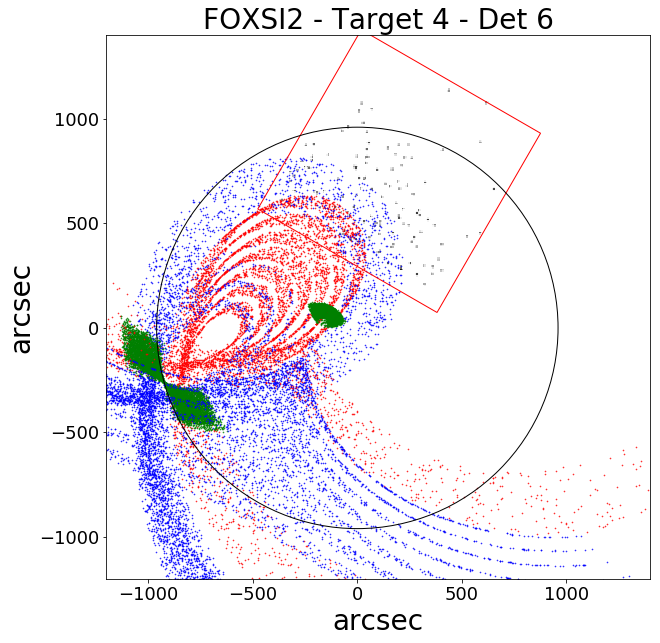

In [30]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.4,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.4,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.4,alpha=0.8)
## AR2
plt.scatter(All_Hx2,All_Hy2,color='red',s=.4,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.4,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.4,alpha=0.8)
## AR3
#plt.scatter(All_Hx3,All_Hy3,color='red',s=.2,alpha=0.8)
#plt.scatter(All_Px3,All_Py3,color='blue',s=.2,alpha=0.8)
#plt.scatter(All_Dx3,All_Dy3,color='green',s=.2,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=28)
plt.ylabel('arcsec',fontsize=28)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('FOXSI2 - Target 4 - Det 6',fontsize=28)
## FOXSI2-Data
ax.imshow(T4D6[0].data,origin='lower',cmap=txray,extent=[-402,795,155,1352])
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[6]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[6],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

# T4 - Det0

### T4 - Det0 data:

In [12]:
T4D0 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d0.fits')

### Active Region 1

In [13]:
BraysA = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1A.csv')
BraysB = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1B.csv')
BraysC = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1C.csv')
Brays = BraysA + BraysB + BraysC
# Fix little bug in rays:
for ray in Brays:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1A.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1B.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR1C.csv loaded.


In [14]:
All_Hx, All_Hy, All_Px, All_Py, All_Dx, All_Dy = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==2 )]
Srays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays = [ray for ray in Brays if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx.append(Hx)
All_Hy.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px.append(Px)
All_Py.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx.append(Dx)
All_Dy.append(Dy)

### Active Region 2

In [15]:
Brays2 = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR2.csv')
# Fix little bug in rays:
for ray in Brays2:
    ray.hist = ray.hist.tolist()
# Create detector :
detector = Detector(width=40,
                    height=40,
                    normal = [0,0,1],
                    center = [0,0,230], # This is corrected by the detectors-paper distance
                    reso = [1024,1024])
# Detector Catch rays:
detector.catchRays(Brays2)

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/makerays/old/rays/D0145AR2.csv loaded.


In [16]:
All_Hx2, All_Hy2, All_Px2, All_Py2, All_Dx2, All_Dy2 = [], [], [], [], [], []

'''Defining D, H, and P rays for each blocker size: '''
Drays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==2 )]
Srays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 )]
Hrays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
Prays2 = [ray for ray in Brays2 if (ray.des[2]==230 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

#sim_scale = 17.18880   # 1cm = 17.4 arcmin
sim_scale = 1031.328   # 1cm = 1031.328 arcsec

#Hyperboloid
Hx, Hy = [], []
for ray in Hrays2:
    Hx.append(ray.pos[0]*sim_scale + x)
    Hy.append(ray.pos[1]*sim_scale + y)
All_Hx2.append(Hx)
All_Hy2.append(Hy)

# Paraboloid
Px, Py = [], []
for ray in Prays2:
    Px.append(ray.pos[0]*sim_scale + x)
    Py.append(ray.pos[1]*sim_scale + y)
All_Px2.append(Px)
All_Py2.append(Py)
        
# Double
Dx, Dy = [], []
for ray in Drays2:
    Dx.append(ray.pos[0]*sim_scale + x)
    Dy.append(ray.pos[1]*sim_scale + y)
All_Dx2.append(Dx)
All_Dy2.append(Dy)

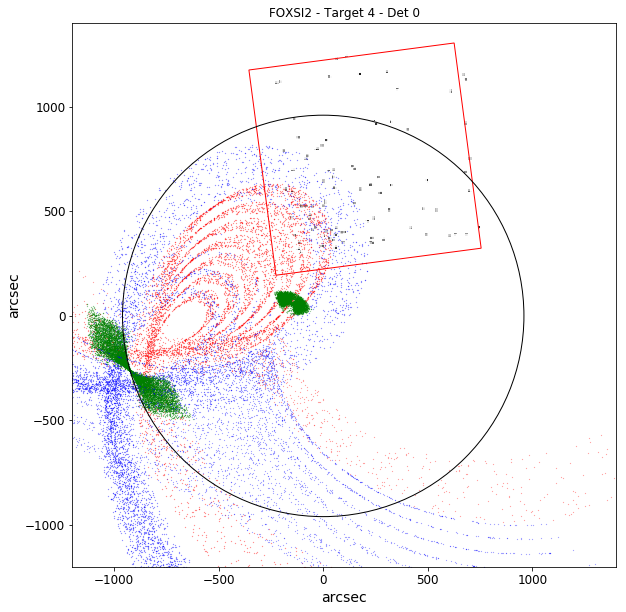

In [17]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.05,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.05,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.05,alpha=0.8)
## AR2
plt.scatter(All_Hx2,All_Hy2,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.03,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 0')
## FOXSI2-Data
ax.imshow(T4D0[0].data,origin='lower',cmap=txray,extent=[-400,797,154,1351])
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[0]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[0],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

# T4 - Det1

### T4 - Det1 data:

In [18]:
T4D1 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d1.fits')

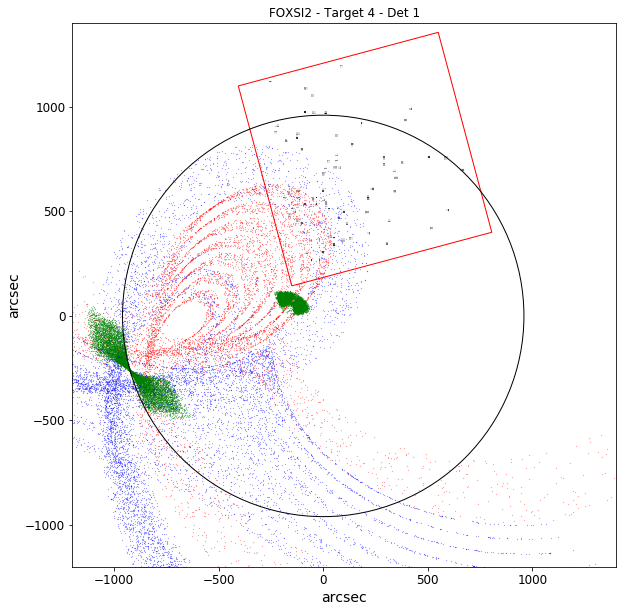

In [19]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.03,alpha=0.8)
## AR2
plt.scatter(All_Hx2,All_Hy2,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.03,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 1')
## FOXSI2-Data
ax.imshow(T4D1[0].data,origin='lower',cmap=txray,extent=[-400,799,147,1346])
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[1]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[1]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[1],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

# T4 - Det4

### T4 - Det4 data:

In [20]:
T4D4 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d4.fits')

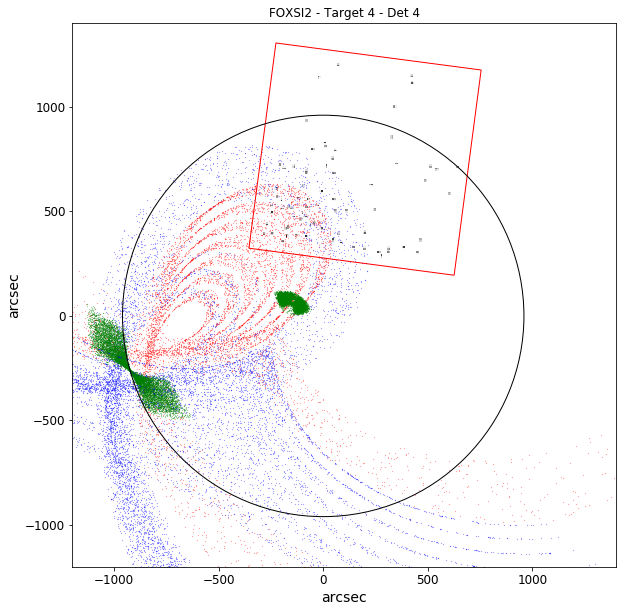

In [21]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.03,alpha=0.8)
## AR2
plt.scatter(All_Hx2,All_Hy2,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.03,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 4')
## FOXSI2-Data
ax.imshow(T4D4[0].data,origin='lower',cmap=txray,extent=[-401,798,149,1348])
## Pos6 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[4]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[4],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()

# T4 - Det5

### T4 - Det5 data:

In [22]:
T4D5 = pyfits.open('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/T4FOXSI2/T4_Fits/foxsi_T4_d5.fits')

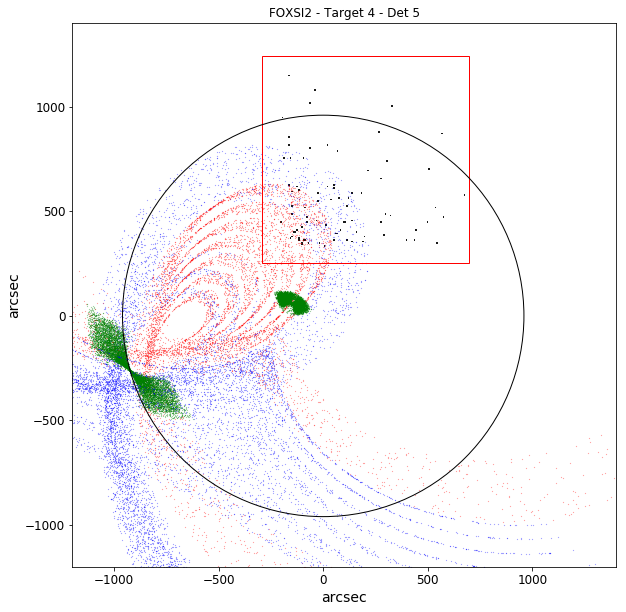

In [23]:
## Plotting
fig, ax = plt.subplots(figsize=(10,10));
## AR1
plt.scatter(All_Hx,All_Hy,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px,All_Py,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx,All_Dy,color='green',s=.03,alpha=0.8)
## AR2
plt.scatter(All_Hx2,All_Hy2,color='red',s=.03,alpha=0.8)
plt.scatter(All_Px2,All_Py2,color='blue',s=.03,alpha=0.8)
plt.scatter(All_Dx2,All_Dy2,color='green',s=.03,alpha=0.8)
## ornaments
plt.xlim(-1200,1400)
plt.ylim(-1200,1400)
plt.xlabel('arcsec',fontsize=14)
plt.ylabel('arcsec',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FOXSI2 - Target 4 - Det 5')
## FOXSI2-Data
ax.imshow(T4D5[0].data,origin='lower',cmap=txray,extent=[-398,801,152,1350])
## Pos5 - Si
l = 990
mx = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-45)) + 1)
my = l/2 * ( np.sqrt(2) * np.sin(np.deg2rad(ang[5]-135)) + 1)
rect = patches.Rectangle((x-l/2+mx,y-l/2+my),990,990,angle=ang[5],linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
circ = patches.Circle((0,0),radius= 960,fill=False);ax.add_patch(circ)
plt.show()